In [1]:
from IPython.core.display import HTML
with open('../style.css') as file:
    css = file.read()
HTML(css)

# Moore's Shortest Path Algorithm

The function `shortest_path` takes two arguments.
- `source` is the start node.  
- `Edges` is a dictionary that encodes the set of edges of the graph.  For every node `x` the value of `Edges[x]` has the form
   $$ \bigl[ (y_1, l_1), \cdots, (y_n, l_n) \bigr]. $$
   This list is interpreted as follows: For every $i = 1,\cdots,n$ there is an edge
   $(x, y_i)$ pointing from $x$ to $y_i$ and this edge has the length $l_i$.
   
The task of the function `shortestPath(source, Edges)` is to compute the distances of all nodes in the graph from the node `source`.
This function works as follows:
- The variable `Distance` is a *dictionary*.  After the computation is
  finished, for every node $x$ such that $x$ is reachable from the node `source`,
  the value `Distance[x]` records the length of the shortest path from `source` to $x$.

  The node `source` has distance $0$ from the node `source` and initially this is
  all we know.  Hence, the dictionary `Distance` is initialized as `{ source: 0 }`.
- The variable `Fringe` is a list of those nodes that already have an estimate of
  their distance from the  node `source`.  Furthermore, if a node is in `Fringe` then this
  node has at least one neighboring node whose distance from `source` hasn't been computed. 
  Initially we only know that the node `source` is connected to the node `source`.
  Therefore, we initialize the list `Fringe` as the list `[source]`. 
- Every iteration of the `while`-loop takes the first node `u` from the `Fringe`.
- Next, we compute all nodes `v` that can be reached from `u` by an edge `(u, v)`. For every such node 
  `v` we check whether reaching `v` from `u` results in a shorter path than previously known.
  There are two cases.
  - If there is an edge from node `u` to a node `v` and  `Distance[v]` is still
    undefined, then we hadn't yet found a path leading to `v`.
  - Furthermore, there are those nodes `v` where we had already found a path leading from
    `source` to `v` but the length of this path is longer than the length of the path
    that we get when we first visit `u` and then proceed to `v` via the edge `(u,v)`.
    
  We compute the distance of the path leading from `source` to `u` and then to
  `v` in both of these cases and add `v` to the `Fringe`.
- The algorithm terminates when the list `Fringe` is empty because in that case we don't
  have any means left to improve our estimate of the distance function.

In [2]:
def shortest_path(source, Edges):
    Distance = { source: 0 }
    Fringe   = [ source ]
    while len(Fringe) > 0:
        u = Fringe.pop()
        for v, l in Edges[u]:
            dv = Distance.get(v, None)
            if dv == None or Distance[u] + l < dv:
                Distance[v] = Distance[u] + l
                if v not in Fringe: 
                    Fringe += [v] 
    return Distance

The version of `shortest_path` that is given below adds some animation to the algorithm.

In [3]:
def shortest_path(source, Edges):
    Distance = { source: 0 }
    Fringe   = [ source ]
    while len(Fringe) > 0:
        display(toDot(source, None, Edges, Fringe, Distance))
        print('_' * 80)
        u = Fringe.pop()
        display(toDot(source, u, Edges, Fringe, Distance))
        print('_' * 80)
        for v, l in Edges[u]:
            dv = Distance.get(v, None)
            if dv == None or Distance[u] + l < dv:
                Distance[v] = Distance[u] + l
                if v not in Fringe: 
                    Fringe += [v] 
    display(toDot(source, None, Edges, Fringe, Distance))
    return Distance

## Code to Display the Directed Graph

In [4]:
import graphviz as gv

The function $\texttt{toDot}(\texttt{source}, \texttt{Edges}, \texttt{Fringe}, \texttt{Distance})$ takes a graph that is represented by 
its `Edges`, a set of nodes `Fringe`, and a dictionary `Distance` that has the distance of a node from the node `source`.

In [5]:
def toDot(source, p, Edges, Fringe, Distance):
    V = set()
    for x in Edges.keys():
        V.add(x)
    dot = gv.Digraph(node_attr={'shape': 'record', 'style': 'rounded'})
    dot.attr(rankdir='LR', size='8,5')
    for x in V:
        if x == source:
            if x != p and x in Fringe:
                dot.node(str(x), color='red', shape='doublecircle')
            elif x == p:
                dot.node(str(x), color='magenta', shape='doublecircle')
            else:
                dot.node(str(x), color='blue', shape='doublecircle')
        else:
            d = str(Distance.get(x, ''))
            if x == p:
                dot.node(str(x), label='{' + str(x) + '|' + d + '}', color='magenta')
            elif x in Fringe:
                dot.node(str(x), label='{' + str(x) + '|' + d + '}', color='red')
            else:
                dot.node(str(x), label='{' + str(x) + '|' + d + '}')
    for u in V:
        for v, l in Edges[u]:
            dot.edge(str(u), str(v), label=str(l))
    return dot

## Code for Testing

In [6]:
Edges = { 'a': [('c', 2), ('b', 9)], 
          'b': [('d', 1)],
          'c': [('e', 5), ('g', 3)],  
          'd': [('f', 2), ('e', 4)],  
          'e': [('f', 1), ('b', 2)],
          'f': [('h', 5)],
          'g': [('e', 1)],
          'h': []
        }

In the diagrams below, the node `u` that is taken from the `Fringe` is colored in <em style="color:magenta">magenta</em>, while the nodes in the `Fringe` 
are colored in <em style="color:red">red</em>.  The start node is colored <em style="color:blue">blue</em> unless
it is part of the `Fringe`or equal to `u`.

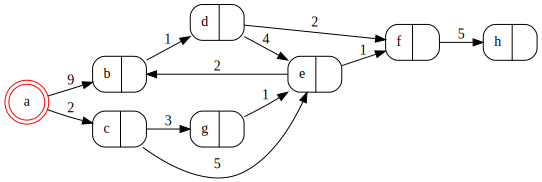

________________________________________________________________________________


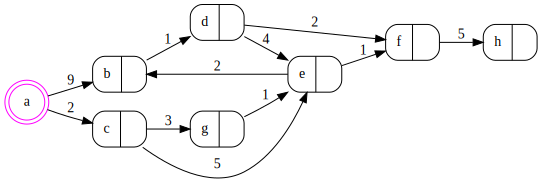

________________________________________________________________________________


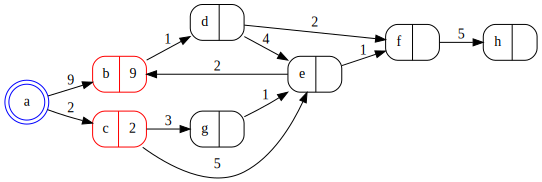

________________________________________________________________________________


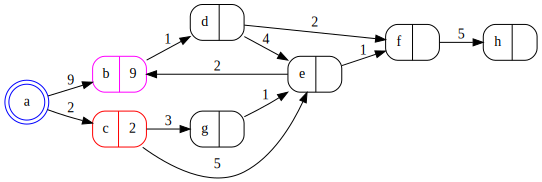

________________________________________________________________________________


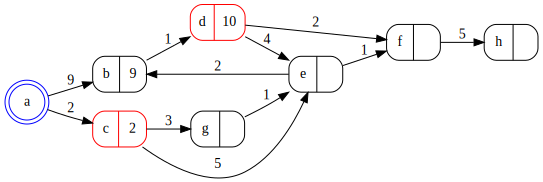

________________________________________________________________________________


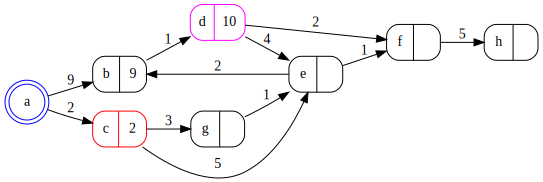

________________________________________________________________________________


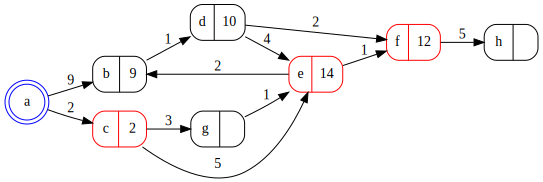

________________________________________________________________________________


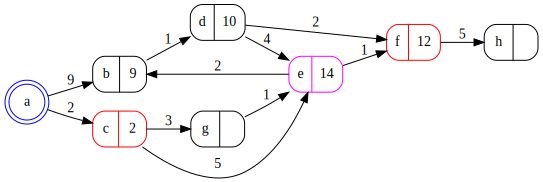

________________________________________________________________________________


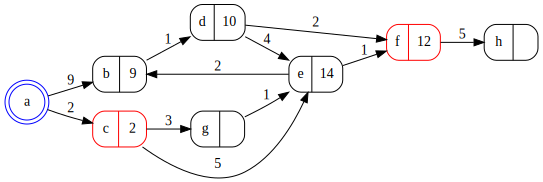

________________________________________________________________________________


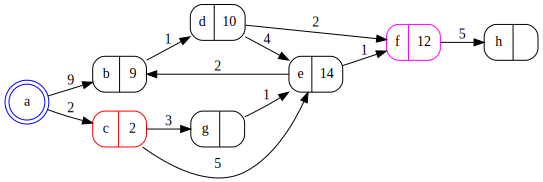

________________________________________________________________________________


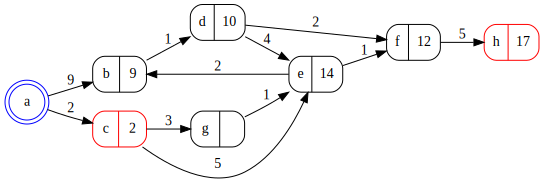

________________________________________________________________________________


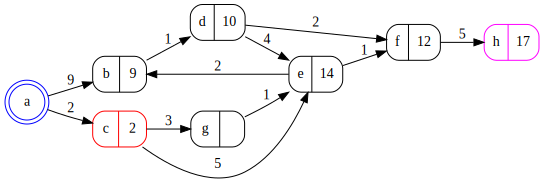

________________________________________________________________________________


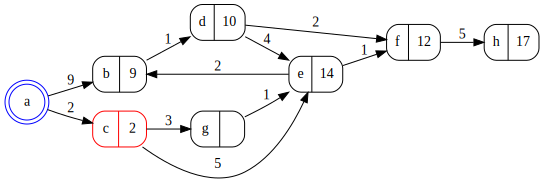

________________________________________________________________________________


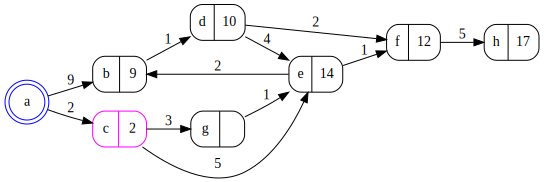

________________________________________________________________________________


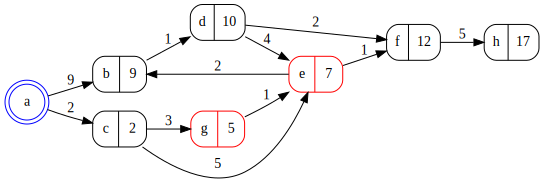

________________________________________________________________________________


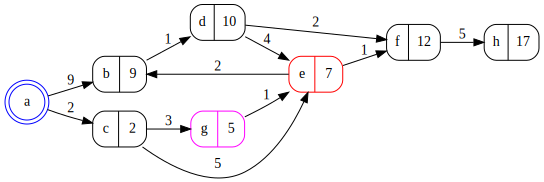

________________________________________________________________________________


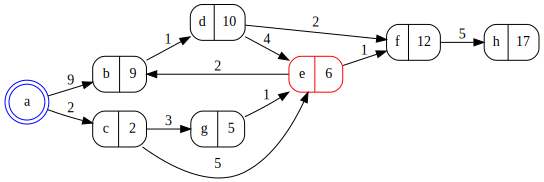

________________________________________________________________________________


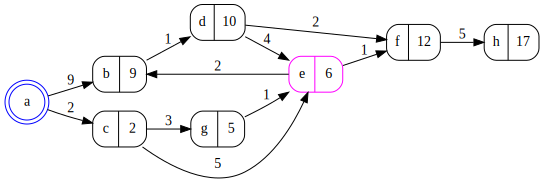

________________________________________________________________________________


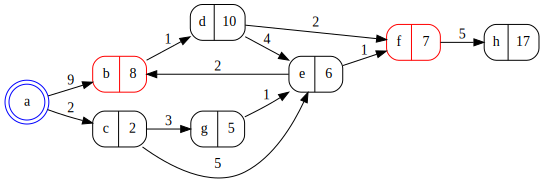

________________________________________________________________________________


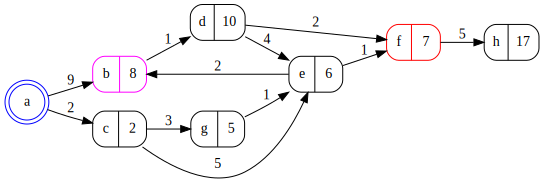

________________________________________________________________________________


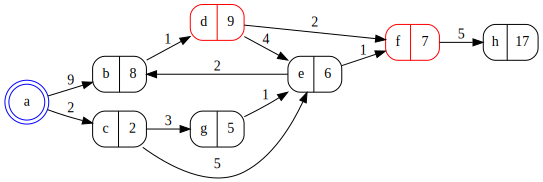

________________________________________________________________________________


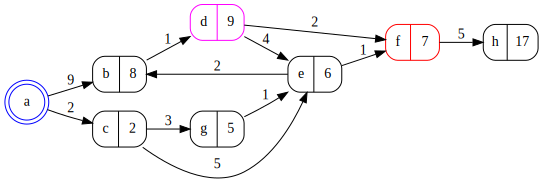

________________________________________________________________________________


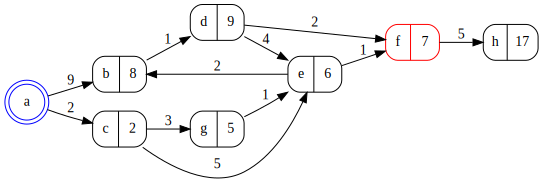

________________________________________________________________________________


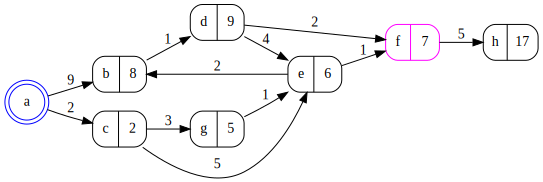

________________________________________________________________________________


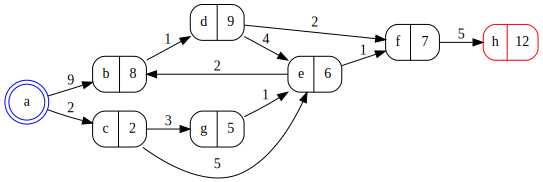

________________________________________________________________________________


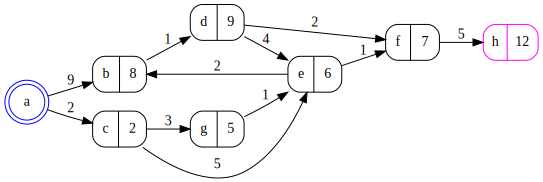

________________________________________________________________________________


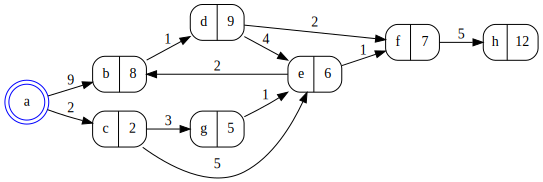

{'a': 0, 'c': 2, 'b': 8, 'd': 9, 'f': 7, 'e': 6, 'h': 12, 'g': 5}

In [7]:
s  = 'a'
sp = shortest_path(s, Edges)
sp